<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/TP21%203.2%20Nikkei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import random, numpy
from numpy.random import seed

SEED = 12345

In [2]:
df = pd.read_excel('Data for NN Nikkei225.xlsx')
df.index = pd.to_datetime(df.Date)
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,,,,
2002-06-11,0.006968,-0.017474,-0.017107,-0.007019,-0.000652,0.001777,0.044855,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1,0
2002-06-12,-0.010689,-0.028876,-0.018571,0.000168,-0.009487,-0.011280,0.080808,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1,0
2002-06-13,-0.016087,-0.037158,-0.030254,-0.002305,-0.000790,-0.011485,0.086449,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1,0
2002-06-14,-0.020118,-0.045277,-0.054719,-0.021482,-0.023615,-0.019898,1.425806,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1,0
2002-06-17,-0.023489,-0.062101,-0.076781,-0.023723,-0.021490,-0.030536,-0.500000,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,1


In [3]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.75, random_state=42, shuffle=False)

In [4]:
X_train.tail()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-14,-0.009999,-0.048961,-0.082791,-0.019481,-0.015481,-0.016049,0.043582,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1
2016-06-15,0.003820,-0.054147,-0.044790,-0.012632,-0.005298,-0.000640,0.038724,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1
2016-06-16,-0.030493,-0.074048,-0.044171,0.004567,-0.005265,-0.022602,0.127193,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1
2016-06-17,0.010724,-0.060338,-0.031481,-0.015086,-0.008685,0.012143,0.084306,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1
2016-06-20,0.023439,-0.003363,-0.015462,0.013259,0.016518,0.016231,-0.210526,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1,-1


In [5]:
X_valid.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,MAE 5,MAE 6,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,0.012766,0.019554,-0.023910,0.002320,0.010406,-0.004098,-0.084091,-1,-1,-1,1,1,1,1,1,1,1,1,1,-1,-1
2016-06-22,-0.006394,0.009180,-0.030960,0.013858,-0.002550,0.013296,-0.076096,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1,-1
2016-06-23,0.010745,0.052106,-0.024509,0.000174,0.006366,0.004831,-0.008057,1,-1,1,1,1,1,1,1,1,1,1,1,-1,-1
2016-06-24,-0.079216,-0.041516,-0.088970,0.014614,0.007704,-0.074347,1.373646,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
2016-06-27,0.023889,-0.041095,-0.070276,-0.072291,-0.064995,0.013297,-0.384411,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1


In [6]:
y_train

Date
2002-06-11    0
2002-06-12    0
2002-06-13    0
2002-06-14    0
2002-06-17    1
             ..
2016-06-14    1
2016-06-15    0
2016-06-16    1
2016-06-17    1
2016-06-20    1
Name: Y, Length: 3436, dtype: int64

In [7]:
y_valid

Date
2016-06-21    0
2016-06-22    1
2016-06-23    0
2016-06-24    1
2016-06-27    1
             ..
2021-03-10    1
2021-03-11    1
2021-03-12    1
2021-03-15    1
2021-03-16    0
Name: Y, Length: 1146, dtype: int64

In [8]:
input_shape = [X_train.shape[1]]
input_shape

[21]

In [9]:
def neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  return (history.history['binary_accuracy'][-1])

In [ ]:
i = 0
accuracy_list = []
for dropout_include in [True, False]:
  for batch in [64, 128, 256, 512, 1024]:
    for nodes_first in [4, 8, 16, 32]:
      for nodes_second in [4, 8, 16, 32]:
        if dropout_include == True:
          for rate__ in [0.2, 0.3, 0.4, 0.5]:
            acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i, rate_=rate__)
            i=i+1
            accuracy_list.append(acc)
        else:
          acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i)
          i=i+1
          accuracy_list.append(acc)

model 0: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5235739350318909
model 1: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5229918360710144
model 2: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5209546089172363
model 3: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5200814604759216
model 4: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5227007865905762
model 5: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5227007865905762
model 6: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5227007865905762
model 7: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5197904706001282
model 8: nodes_first= 4, nodes_second=16, batch=

In [ ]:
sorted(range(len(accuracy_list)), key=lambda x: accuracy_list[x])[-5:]

[399, 332, 383, 252, 360]

# Top-5 models

model 360: nodes_first= 16, nodes_second=4, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5480209589004517

model 252: nodes_first= 32, nodes_second=32, batch=512, dropout_include=True, rate=0.2. Binary accuracy: 0.543364405632019

model 383: nodes_first= 32, nodes_second=32, batch=512, dropout_include=False, rate=None. Binary accuracy: 0.5430733561515808

model 332: nodes_first= 32, nodes_second=4, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5419092178344727

model 339: nodes_first= 4, nodes_second=32, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.521536648273468

In [19]:
def neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", colormap='bwr')

  # print(history_df.loc[:, ['loss', 'val_loss']].head())

  history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy", colormap='bwr')

  plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [20]:
# model 360: nodes_first= 16, nodes_second=4, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5480209589004517

# model 252: nodes_first= 32, nodes_second=32, batch=512, dropout_include=True, rate=0.2. Binary accuracy: 0.543364405632019

# model 383: nodes_first= 32, nodes_second=32, batch=512, dropout_include=False, rate=None. Binary accuracy: 0.5430733561515808


model 360: nodes_first= 16, nodes_second=4, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5480209589004517


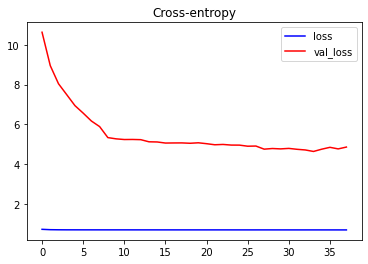

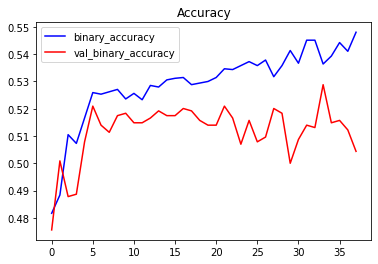

In [21]:
neural_network_analysis(16, 4, 256, False, SEED, X_train, y_train, X_valid, y_valid, 360)

model 360: nodes_first= 32, nodes_second=32, batch=512, dropout_include=True, rate=0.2. Binary accuracy: 0.543364405632019


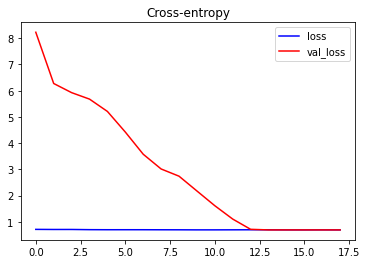

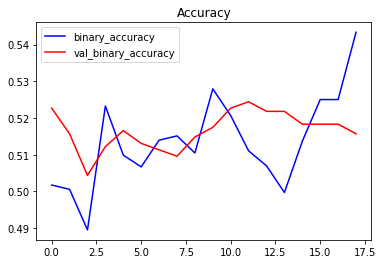

In [23]:
neural_network_analysis(32, 32, 512, True, SEED, X_train, y_train, X_valid, y_valid, 252, rate_=0.2)

model 383: nodes_first= 32, nodes_second=32, batch=512, dropout_include=False, rate=None. Binary accuracy: 0.5430733561515808


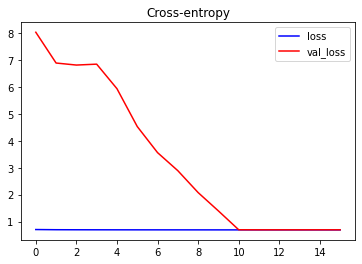

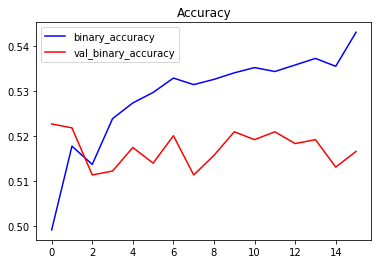

In [24]:
neural_network_analysis(32, 32, 512, False, SEED, X_train, y_train, X_valid, y_valid, 383)